In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Random Sampling

In [2]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


Lets add the row number to each row, so that the number for the first row is 0, the number of the 2nd row is 1, ...

In [6]:
# answer below


united = united.with_column('row#', np.arange(united.num_rows))
united

Date,Flight Number,Destination,Delay,row#
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


In [11]:
united = united.move_to_start('row#')
united

row#,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


Now lets look at the 9th row

In [12]:
united.take(9)

row#,Date,Flight Number,Destination,Delay
9,6/1/15,317,IND,-10


### Deterministic Sample

Lets choose all the flights whose `Destination` is Philly

In [15]:
philly_dest = united.where('Destination', 'PHL')
philly_dest

row#,Date,Flight Number,Destination,Delay
4,6/1/15,267,PHL,64
99,6/1/15,1422,PHL,-2
155,6/2/15,267,PHL,-4
248,6/2/15,1422,PHL,4
301,6/3/15,267,PHL,-6
396,6/3/15,1422,PHL,5
452,6/4/15,267,PHL,2
592,6/4/15,1947,PHL,29
609,6/5/15,267,PHL,6
754,6/5/15,1947,PHL,-2


Question: Why is this a deterministic sample?

bc drawing this sample from the population of flights did not involve any chance

### A Systematic Sample

Lets find every 1000-th flight

In [16]:
united.num_rows

13825

In [17]:
united.take(9)

row#,Date,Flight Number,Destination,Delay
9,6/1/15,317,IND,-10


In [19]:
united.take(make_array(1,2,3))

row#,Date,Flight Number,Destination,Delay
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0


In [20]:
united.take(0)

row#,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257


In [23]:
united.take(make_array(0,1000))

row#,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7


In [26]:
united.take(np.arange(0,united.num_rows,1000))

row#,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


Now lets start at a random row and then take every 1,000-th flight from there

In [31]:
np.random.choice(np.arange(1000))

46

In [34]:
united.take(np.arange(np.random.choice(np.arange(1000)),united.num_rows,1000))

row#,Date,Flight Number,Destination,Delay
544,6/4/15,1460,EWR,15
1544,6/11/15,611,SEA,-5
2544,6/17/15,1928,ORD,54
3544,6/24/15,1250,IAH,-2
4544,7/1/15,704,JFK,-5
5544,7/8/15,704,JFK,6
6544,7/14/15,1748,AUS,-3
7544,7/21/15,1084,SEA,-7
8544,7/27/15,1975,FLL,46
9544,8/3/15,1168,EWR,-6


### A Random Sample

In [35]:
systematic_sample = united.take(np.random.choice(np.arange(1000), 5)) 
systematic_sample.show()

row#,Date,Flight Number,Destination,Delay
110,6/1/15,1563,BWI,-3
709,6/5/15,1534,SEA,20
125,6/1/15,1662,BOS,35
147,6/1/15,1911,AUS,-3
897,6/7/15,309,IAD,59


### What's the probability of getting this sample?

What's the probability of getting one specific rows?


In [37]:
1 / united.num_rows

7.233273056057866e-05

What's the probability of getting three specific rows?


In [38]:
(1 / united.num_rows) * (1/ united.num_rows) * (1/united.num_rows)


3.7844657579379896e-13

Now let's extrapulate that to our sample of 5 rows:


In [40]:
total_probability = (1 / united.num_rows) * (1/ united.num_rows) * (1/united.num_rows) * (1/united.num_rows) * (1/united.num_rows)
total_probability

1.9800415333429635e-21

In [45]:
def sample_probability(sample_size, replacement=True):
    '''Given the sample size, return the probability of getting those specific number of rows
    argument: indicates if sampling with replacement (default is True) '''
    total_probability = 1
    for i in np.arange(sample_size):
        # tghis assumes sampling with replacement
        if replacement:
            total_probability = total_probability * (1 / united.num_rows)
        # what if we were sampling without replacement
        else:
            total_probability = total_probability * (1 / (united.num_rows- i))
    return total_probability

sample_probability(1) > sample_probability(10)

True

In [46]:
sample_probability(10, replacement=True),  sample_probability(10, replacement=False)

(3.920564473763154e-42, 3.9333495297919694e-42)

(back to slides)

### Sample of convenience

In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = ... 
systematic_sample.show()

<details>,
<summary>Solution</summary>
  united.take(np.arange(start, united.num_rows, 1000))
</details>


(back to slides)

# Distributions

Lets create a 6-sided die

In [47]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


### How can we take 10 samples of rolling a die

<details>,
<summary>Solution</summary>
  die.sample(10)
</details>

In [49]:
 # Hint: look at python reference for sampling form a table
ten_rolls = die.sample(10)
ten_rolls

Face
3
3
3
5
2
6
6
1
3
3


### Whats the initial probability of each side?
<br><br><br><br> answer below


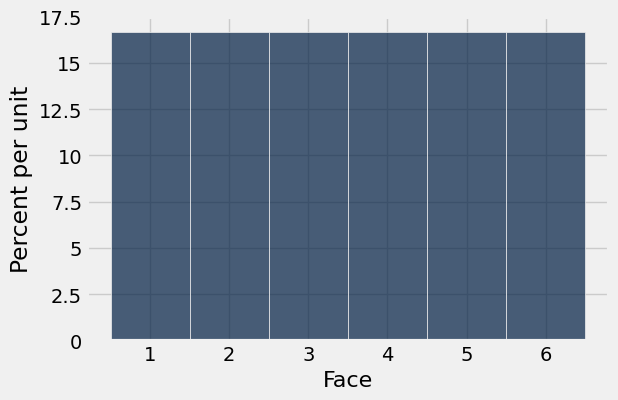

In [50]:
die.hist(bins=np.arange(0.5, 7.5, 1))

How did our sample fall out?

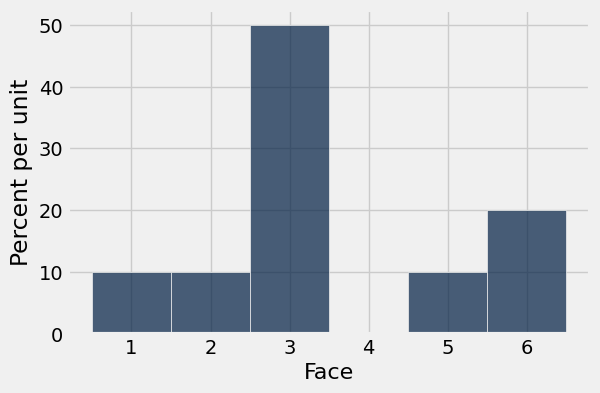

In [51]:
ten_rolls.hist(bins=np.arange(0.5, 7.5, 1))

(back to slides)

# Law of large numbers

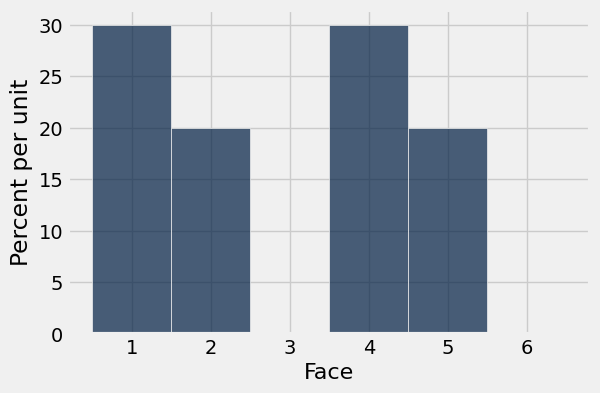

In [52]:
die.sample(10).hist(bins=np.arange(0.5, 7.5, 1))

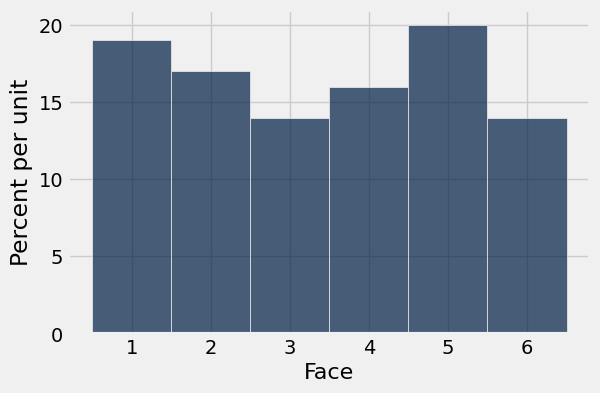

In [53]:
die.sample(100).hist(bins=np.arange(0.5, 7.5, 1))

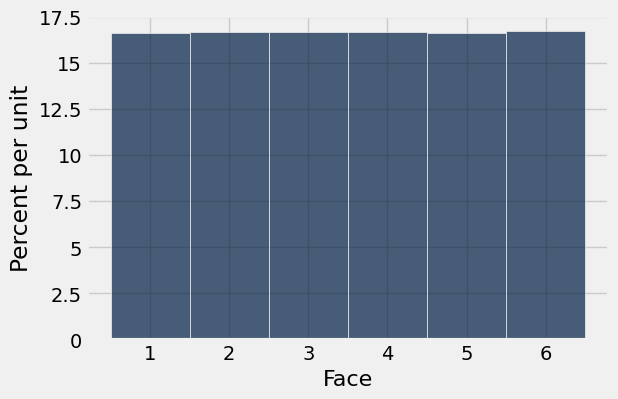

In [54]:
die.sample(int(1e6)).hist(bins=np.arange(0.5, 7.5, 1))

In [55]:
die = np.arange(1,7)
die

array([1, 2, 3, 4, 5, 6])

### Let's roll a dice 10, 50, and 10,000 times and see the distribution of rolls

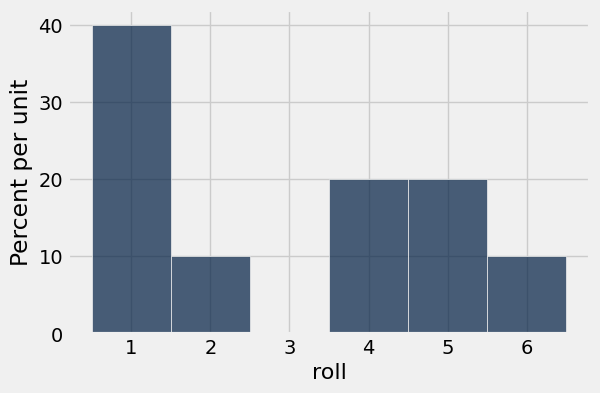

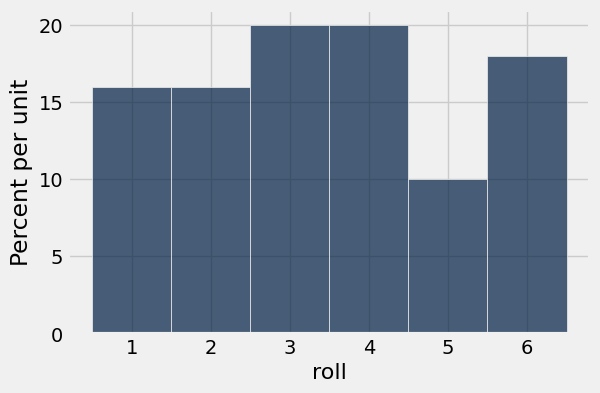

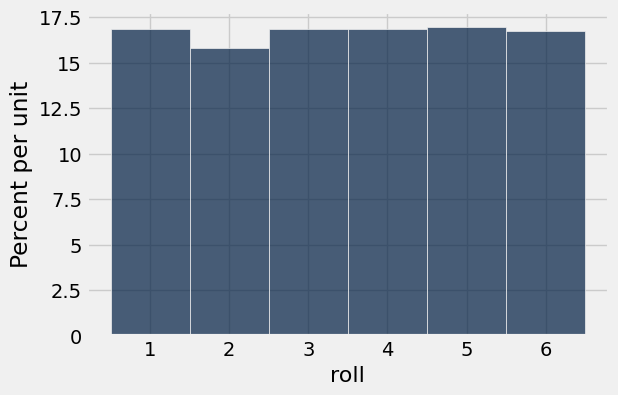

In [58]:
for i in make_array(10, 50, 10000):
    Table().with_columns('roll', np.random.choice(die,i)).hist('roll', bins=np.arange(0.5,7.5, 1))

### Repeat the above multiple times and see the differences

(back to slides)
# Simulating Statistics 

### Average time of all delays

In [59]:
np.mean(united.column('Delay'))

16.658155515370705

### Average time of 10 random delays

In [60]:
np.mean(united.sample(10).column('Delay'))

5.7000000000000002

In [61]:
np.mean(united.sample(10).column('Delay'))

25.800000000000001

#### Write a function that given a specified sample size called `size`, returns the mean of those `size` samples

What type is `size` here?

In [62]:
def sample_mean(size):
    return np.mean(united.sample(size).column('Delay')) 

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


In [79]:
sample_mean(10)

31.0

In [72]:
np.mean(united.column('Delay'))

16.658155515370705

In [89]:
sample_mean(1000)

16.094999999999999